<a href="https://colab.research.google.com/github/syedaafreen-07/Algebra/blob/main/diabetic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset/Diabetes.csv")

In [ ]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

,0
pregnancies,0
glucose,0
diastolic,0
triceps,0
insulin,0
bmi,0
dpf,0
age,0
diabetes,0


In [ ]:
df['diabetes'].value_counts()

,count
diabetes,
0,500
1,268


In [ ]:
df.groupby('diabetes').mean()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
diabetes,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
df.corr(numeric_only=True)['diabetes']

,diabetes
pregnancies,0.221898
glucose,0.466581
diastolic,0.065068
triceps,0.074752
insulin,0.130548
bmi,0.292695
dpf,0.173844
age,0.238356
diabetes,1.000000


<Axes: >

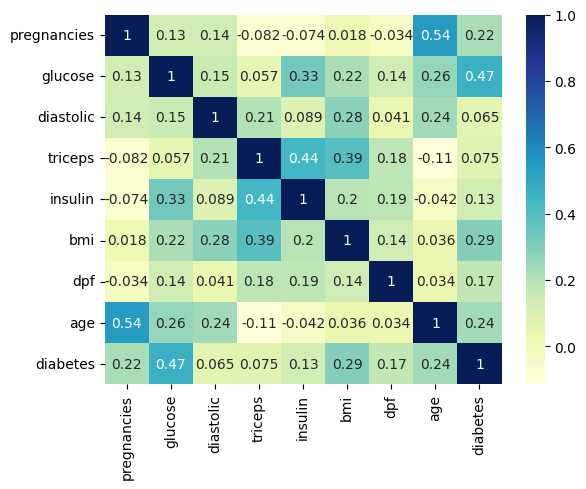

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='YlGnBu')

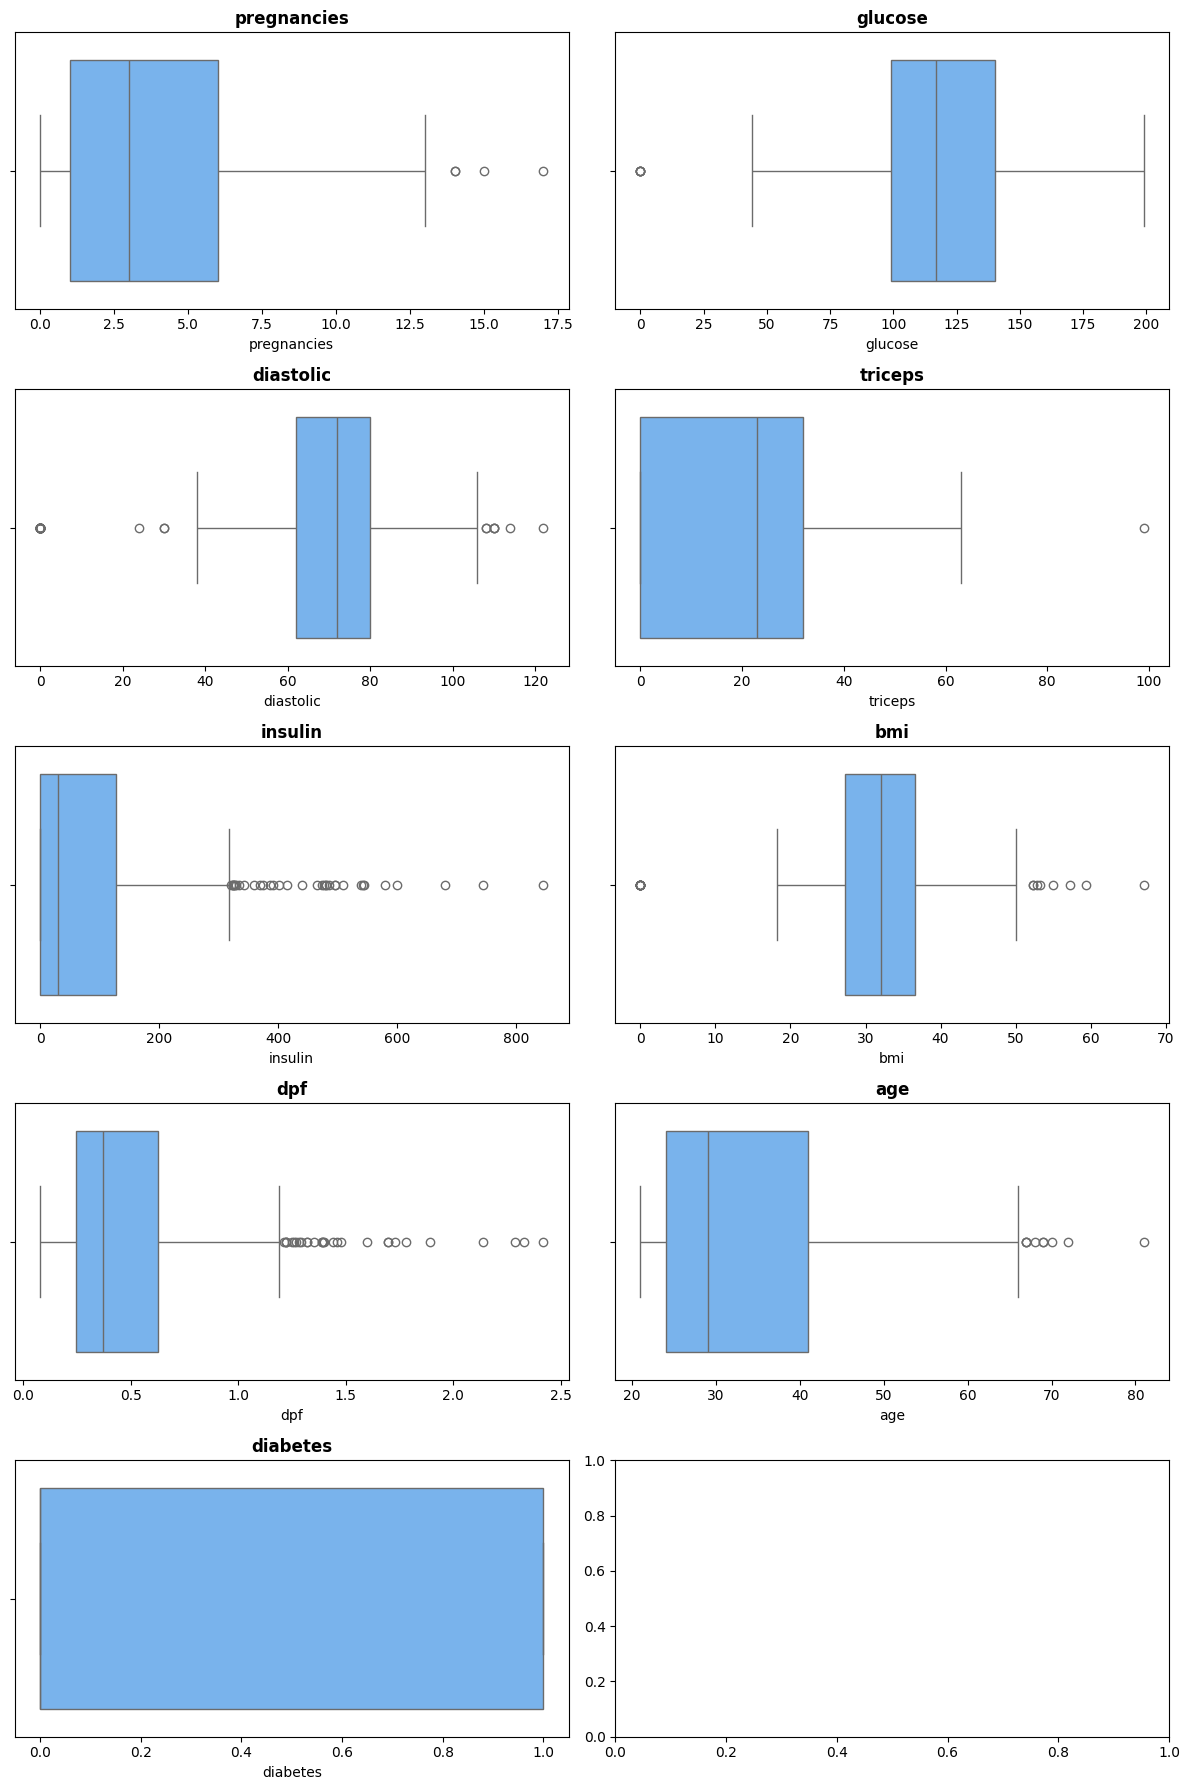

In [ ]:
columns = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf',
           'age', 'diabetes']
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(12,18))

for idx in range(len(columns)):
    axis = ax.flatten()[idx]
    sns.boxplot(data=df, x=columns[idx], color='#66b3ff', ax=axis)
    axis.set_title(f'{columns[idx]}', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
def iqr_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound,
                 np.where(df[column] > upper_bound, upper_bound, df[column]))

    return df

In [ ]:
columns = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf',
           'age']
for col in columns:
  df = iqr_capping(df,col)

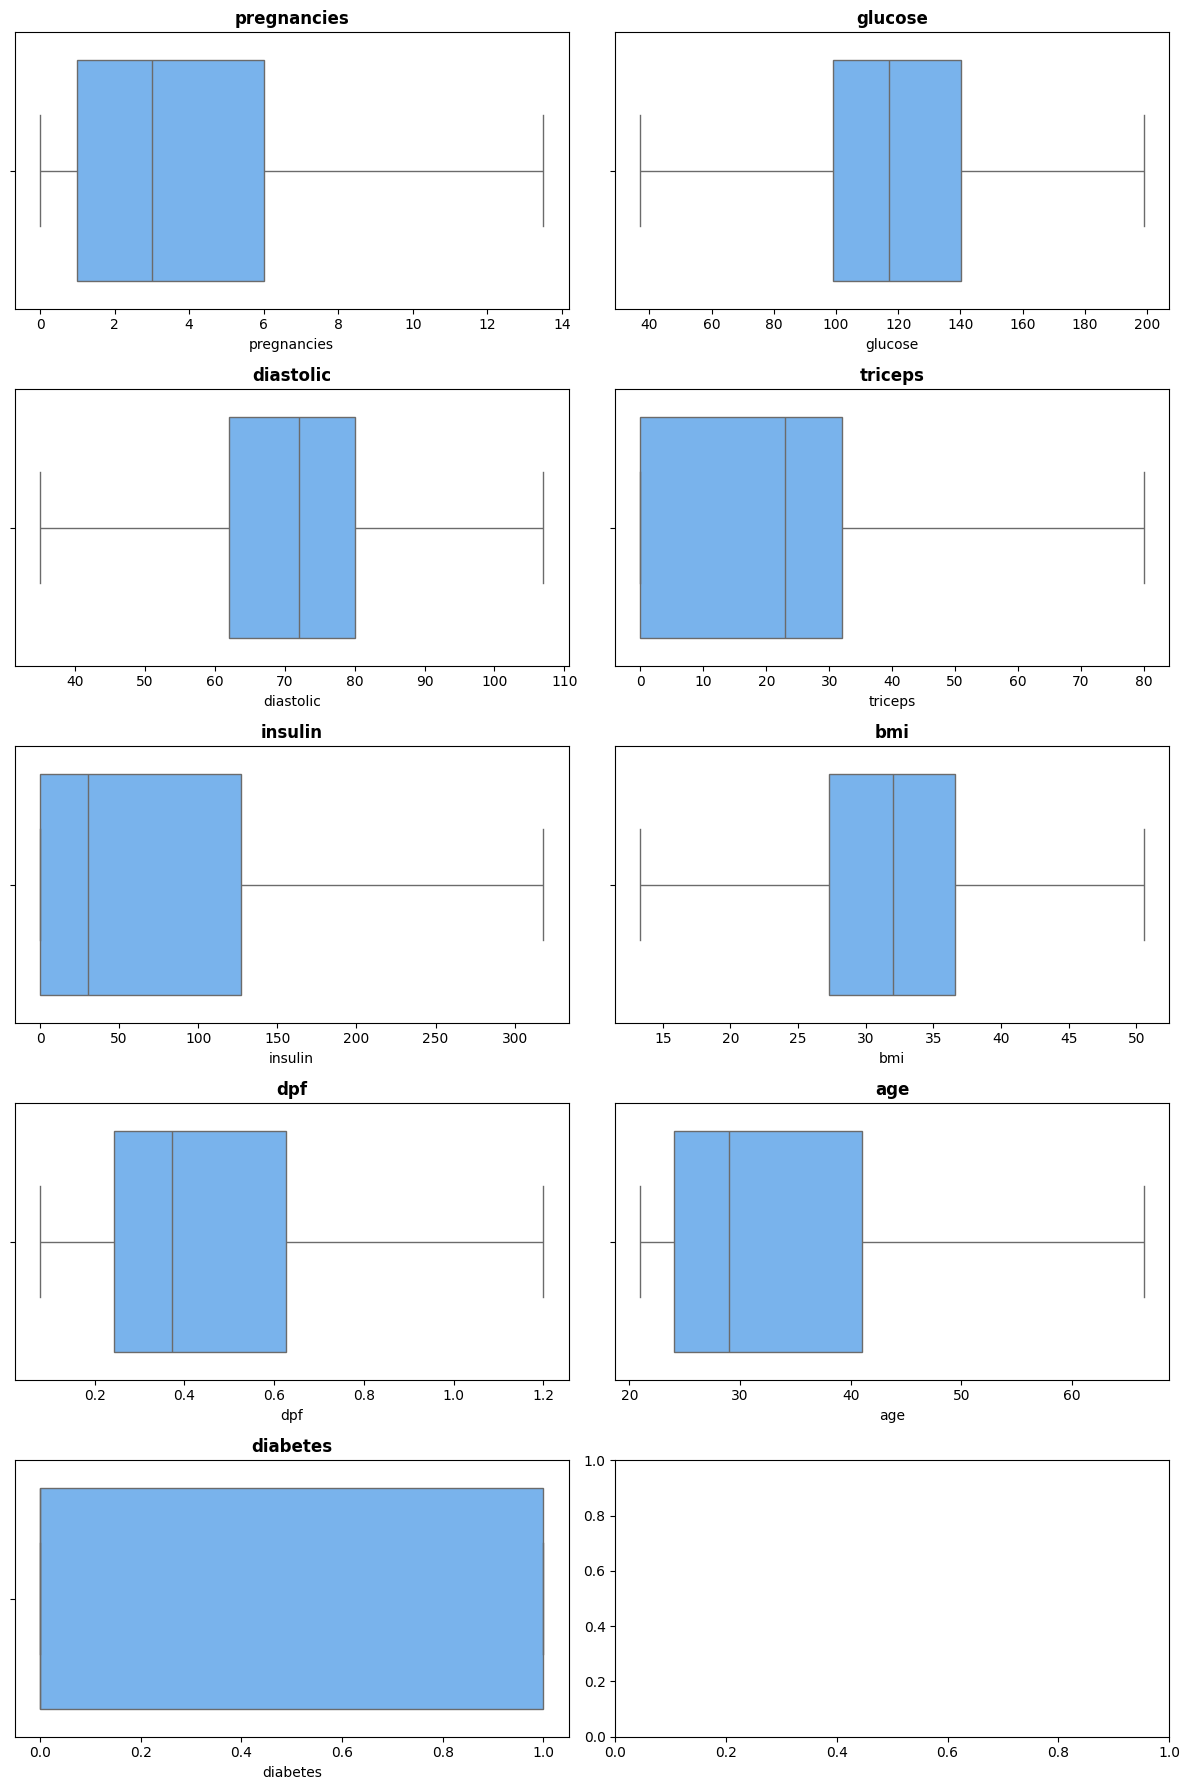

In [ ]:
columns = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf',
           'age','diabetes']
fig,ax = plt.subplots(nrows=5,ncols=2,figsize=(12,18))

for idx in range(len(columns)):
    axis = ax.flatten()[idx]
    sns.boxplot(data=df, x=columns[idx], color='#66b3ff', ax=axis)
    axis.set_title(f'{columns[idx]}', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
x=df.drop(columns='diabetes',axis=1)
y=df['diabetes']

In [ ]:
x

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [ ]:
y

,diabetes
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df,
                    x='pregnancies',
                    y='glucose',
                    z='age',
                    color='diabetes',
                    color_discrete_sequence=px.colors.qualitative.G10,
                    title='Diabetes and Non Diabetes',
                    opacity=0.7)

fig.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
scale=StandardScaler()

In [ ]:
X_scaled = scale.fit_transform(x)

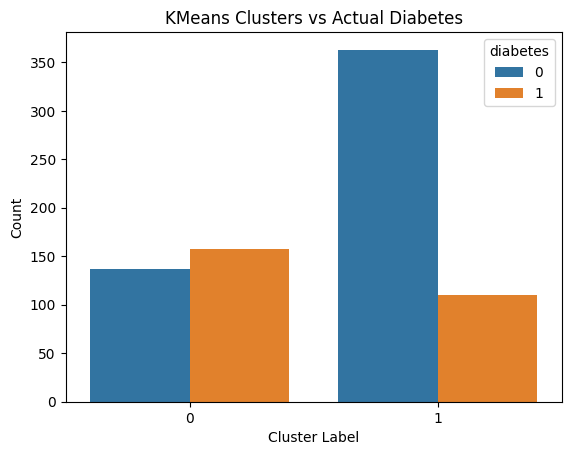

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

sns.countplot(x='cluster', hue='diabetes', data=df)
plt.title('KMeans Clusters vs Actual Diabetes')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

In [ ]:
df.groupby('cluster')['diabetes'].value_counts()

cluster  diabetes
0        1           158
         0           137
1        0           363
         1           110
Name: count, dtype: int64

In [ ]:
print(kmeans.cluster_centers_)

[[ 0.10144637  0.56326263  0.32444615  0.78846507  0.82233491  0.58101409
   0.36049617  0.13696573]
 [-0.06326993 -0.35129487 -0.20235014 -0.49174883 -0.51287272 -0.36236608
  -0.22483376 -0.0854226 ]]


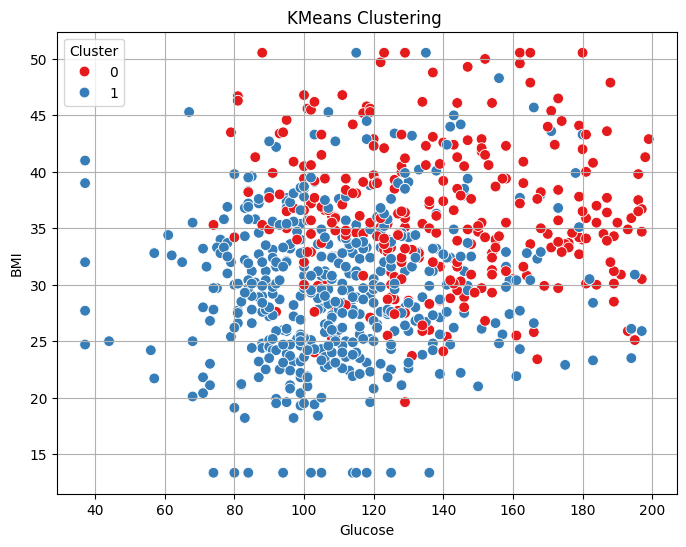

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='glucose', y='bmi', hue='cluster', palette='Set1', s=60)
plt.title('KMeans Clustering ')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
standardized_data = scale.transform(x)

In [ ]:
standardized_data

array([[ 0.64714967,  0.86192556,  0.09269135, ...,  0.20935933,
         0.58892732,  1.44569096],
       [-0.84896998, -1.15943299, -0.33020145, ..., -0.78425421,
        -0.37810147, -0.189304  ],
       [ 1.24559754,  1.98490253, -0.47116571, ..., -1.25267202,
         0.74659506, -0.10325164],
       ...,
       [ 0.34792574, -0.00437096,  0.09269135, ..., -0.84103213,
        -0.74949659, -0.27535637],
       [-0.84896998,  0.15605432, -0.75309424, ..., -0.28744744,
        -0.38510892,  1.18753386],
       [-0.84896998, -0.90275254, -0.04827292, ..., -0.24486401,
        -0.50423566, -0.87772293]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, stratify=y, random_state=2)

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [ ]:
new_patient = pd.DataFrame([{
    'pregnancies': 5,
    'glucose': 120,
    'diastolic': 52,
    'triceps': 20,
    'insulin': 87,
    'bmi': 25,
    'dpf': 0.3,
    'age': 32
}])



new_scaled = scale.transform(new_patient)

prediction = classifier.predict(new_scaled)
print("Predicted:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")


Predicted: Non-Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [ ]:
new_patient = pd.DataFrame([{
    'pregnancies': 6,
    'glucose': 170,
    'diastolic': 90,
    'triceps': 38,
    'insulin': 200,
    'bmi': 36.0,
    'dpf': 1.6,
    'age': 50
}])
new_scaled = scale.transform(new_patient)

prediction = classifier.predict(new_scaled)
print("Predicted:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")

Predicted: Non-Diabetic


In [ ]:
high_risk_diabetic = pd.DataFrame([{
    'pregnancies': 8,
    'glucose': 185,
    'diastolic': 92,
    'triceps': 45,
    'insulin': 250,
    'bmi': 38.0,
    'dpf': 2.0,
    'age': 55
}])
new_scaled = scale.transform(new_patient)

prediction = classifier.predict(new_scaled)
print("Predicted:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")

Predicted: Non-Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

